# Handling FITS files

The FITS (Flexible Image Transport System) standard is widely used in Astronomy for storing image data. It can also be used to store other structured data such as tables.

In this notebook we'll load a FITS file containing an image and accompanying data, take a look at the accompanying header information, plot the image, manipulate the data and save it back in to a new FITS file.

### Reading Data
First we load a few useful modules for plotting and manipulating data

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

We also need to import the `fits` methods from the astropy module 

In [4]:
from astropy.io import fits

Now we are ready to load some data. In the `data` folder inside the course directory there are some example FITS files. To load one of these in to Python we use the `open` function, and pass the location of the file we want as the first argument.

In [5]:
eagle_OIII = fits.open('data/502nmos.fits')

If we call this variable on its own we can see that it's made up of two HDU (Header Data Unit) objects. A HDU is a high level FITS file component, typically containing data and an associated header.

In [6]:
eagle_OIII

To access each HDU, just use python's zero based indexing.

In [7]:
eagle_OIII[0]

For more detailed information about each HDU we can call the `info` function.

In [8]:
eagle_OIII.info()

Filename: data/502nmos.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     290   (1600, 1600)   float32   
1    502nmos_cvt.tab  TableHDU       353   1R x 49C     [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


There are also 'convenience' functions that allow you to access the data or headers directly. These can be useful when doing interactive Python sessions, but are inefficient in terms of performance compared to the approach shown above using `open`. Throughout this course we will use the more verbose approach for clarity and performance.

### Headers
Each HDU has its own header file. The header provides detailed information about the HDU. To view it, first subset by the HDU you want, then call the `header` function. Below, we display the header for both the image and the table in our chosen FITS file.

In [9]:
eagle_OIII[0].header

SIMPLE  =                    T / FITS STANDARD                                  
BITPIX  =                  -32 / FITS BITS/PIXEL                                
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 1600 /                                                
NAXIS2  =                 1600 /                                                
EXTEND  =                    T / There maybe standard extensions                
BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =                0.0E0 /                                                
OPSIZE  =                 2112 / PSIZE of original image                        
ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     
FITSDATE= '2005-07-01'         / Date FITS file was created                     
FILENAME= '502nmos_cvt.hhh'    / Original filename                              
ALLG-MAX=           0.000000

In [10]:
eagle_OIII[1].header

XTENSION= 'TABLE   '           / Ascii table extension                          
BITPIX  =                    8 / 8-bits per 'pixels'                            
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                  796 / Number of characters per row                   
NAXIS2  =                    1 / The number of rows                             
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
TFIELDS =                   49 / Number of fields per row                       
EXTNAME = '502nmos_cvt.tab'    / Name of table                                  
                                                                                
TTYPE1  = 'CRVAL1  '           /                                                
TBCOL1  =                    1 /                                                
TFORM1  = 'D25.17  '        

There is a wealth of information within the header, from dates and authors to instruments and filters used.

We can save the header in to a variable, which we do below in to the imaginatively named `header`.

In [11]:
header = eagle_OIII[0].header

Individual header values can be accessed by name

In [12]:
header['INSTRUME']

'WFPC2'

Header entries can also have associated comments that provide further information on a given entry. To access and modify these, use the comments function and pass the name of the value as the argument.

In [13]:
header.comments['INSTRUME']

'instrument in use'

To add a new value to the header specify the new keyword and assign the desired value.

In [14]:
header['MODIFIED'] = '6 Mar 2016'

To remove a header value, use the `remove` function and pass the name of the value you wish to remove

In [15]:
header.remove('HISTORY')

Remember that none of these changes will affect the original file until they are saved. We will cover this later in this notebook.

### Image Data


Accessing image and table data is a simple as accessing the header. Just use the `data` function on an image HDU. This returns a numpy array, so we can use all of the typical numpy functions to investigate and manipulate the array.

In [16]:
data = eagle_OIII[0].data

In [17]:
data.shape

(1600, 1600)

In [18]:
data.dtype.name

'float32'

In [19]:
print 'Min:', np.min(data)
print 'Max:', np.max(data)
print 'Mean:', np.mean(data)
print 'Stdev:', np.std(data)

Min: -12.4393
Max: 2925.87
Mean: 6.23727
Stdev: 15.7682


We can view the image with a simple call to `pyplot`

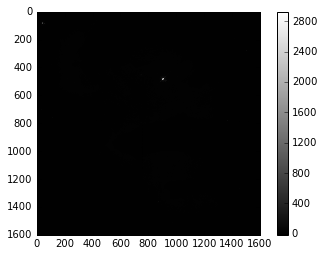

In [20]:
plt.imshow(data, cmap='gray')
plt.colorbar()

Not particularly interesting. We can plot a histogrm of the data to get a better idea of what is going on.

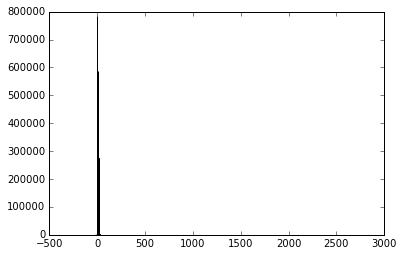

In [21]:
histogram = plt.hist(data.flat, bins=1000)

Almost all of the pixels have values below $10^{-15}$. In fact, there's a foreground star producing a pixel count far greater than the background image, so it doesn't appear on this linear scale. Let's adjust the scale so that we can see the features better

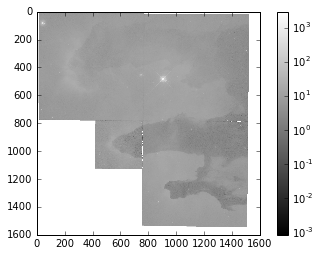

In [22]:
from matplotlib.colors import LogNorm
plt.imshow(data, cmap='gray', norm=LogNorm())
plt.colorbar()

We can now pick out the pillars of the Eagle nebula. We could also set a maximum pixel count limit using the vmax argument to limit the high values associated with the foreground star.

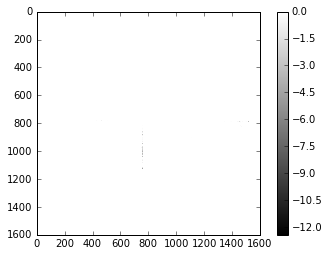

In [23]:
plt.imshow(data, cmap='gray', vmax=1e-17)
plt.colorbar()

### Tables

One of the reasons that FITS is so popular with astronomers is that you can store image and tabular data together in a single file. This is useful for ensuring your research is reproducible; you're less likely to lose or separate your data if it's all in the same place.

Astropy tables also include a host of useful functionality for handling astronomical data. If you're doing any 'heavy lifting' with your data (anything that takes a lot of computational power) it's probably worth taking it out of Astropy and using a more dedicated package, such as Pandas. However, for astronomy specific unit conversions and certain grouping operations, Astropy tables can be indispensable.

Below we'll go through how to manipulate data in Astropy tables, and convert back and forth between them and Pandas dataframes.

#### Reading Tables

First, we'll take a look at the data we already have loaded. The second HDU was a table, so let's load this in to a dedicated variable.

In [27]:
table = eagle_OIII[1]

Use the `name` function to print the name of the table.

In [28]:
table.name

'502nmos_cvt.tab'

To access the raw data, use the `data` function.

In [31]:
table.data

FITS_rec([ (274.71130937176997, -13.816000630103998, 386.5, 396.0, 1.8780131e-05, -2.0311931e-05, -2.0293581e-05, -1.8797111e-05, 0.0, 0.0, 'T', -131.9115, 0, 0, 49808.863704366304, 49808.863872190399, 'RA---TAN', 'DEC--TAN', 4, 311.2883, 311.32581, 311.25089, -1.921564, 4128.0581, 8.2847509, 559916, 0, 80081, 0, 5, 0, 0, 0, 'WFPC2,4,A2D7,F502N,,CAL', 3.026684e-16, -21.1, 5012.9102, 48.40781, 6.8006082, 3.6499541, 6.5017462, 0.01308636, 10.52821, 10.84973, 10.78265, 10.71748, 9.907546, 8.59161, 3.2858679)], 
      dtype=(numpy.record, {'names':['CRVAL1','CRVAL2','CRPIX1','CRPIX2','CD1_1','CD1_2','CD2_1','CD2_2','DATAMIN','DATAMAX','MIR_REVR','ORIENTAT','FILLCNT','ERRCNT','FPKTTIME','LPKTTIME','CTYPE1','CTYPE2','DETECTOR','DEZERO','BIASEVEN','BIASODD','GOODMIN','GOODMAX','DATAMEAN','GPIXELS','SOFTERRS','CALIBDEF','STATICD','ATODSAT','DATALOST','BADPIXEL','OVERLAP','PHOTMODE','PHOTFLAM','PHOTZPT','PHOTPLAM','PHOTBW','MEDIAN','MEDSHADO','HISTWIDE','SKEWNESS','MEANC10','MEANC25','MEANC50',

To view the first row of the table just use Python's typical zero-based indexing 

In [36]:
table.data[0]

(274.71130937176997, -13.816000630103998, 386.5, 396.0, 1.8780131e-05, -2.0311931e-05, -2.0293581e-05, -1.8797111e-05, 0.0, 0.0, 'T', -131.9115, 0, 0, 49808.863704366304, 49808.863872190399, 'RA---TAN', 'DEC--TAN', 4, 311.2883, 311.32581, 311.25089, -1.921564, 4128.0581, 8.2847509, 559916, 0, 80081, 0, 5, 0, 0, 0, 'WFPC2,4,A2D7,F502N,,CAL', 3.026684e-16, -21.1, 5012.9102, 48.40781, 6.8006082, 3.6499541, 6.5017462, 0.01308636, 10.52821, 10.84973, 10.78265, 10.71748, 9.907546, 8.59161, 3.2858679)

To subset by columns (or fields, in `numpy` parlance), use the `field` function with a zero-based index. In our example we have only one row of data, so just the one value is returned.

In [42]:
table.data.field(0)

array([ 274.71130937])

To see what columns are available, use the `columns` function

In [50]:
table.data.columns

ColDefs(
    name = 'CRVAL1'; format = 'D25.17'; disp = 'G25.16'; start = 1
    name = 'CRVAL2'; format = 'D25.17'; disp = 'G25.16'; start = 27
    name = 'CRPIX1'; format = 'E15.7'; disp = 'G15.7'; start = 53
    name = 'CRPIX2'; format = 'E15.7'; disp = 'G15.7'; start = 69
    name = 'CD1_1'; format = 'E15.7'; disp = 'G15.7'; start = 85
    name = 'CD1_2'; format = 'E15.7'; disp = 'G15.7'; start = 101
    name = 'CD2_1'; format = 'E15.7'; disp = 'G15.7'; start = 117
    name = 'CD2_2'; format = 'E15.7'; disp = 'G15.7'; start = 133
    name = 'DATAMIN'; format = 'E15.7'; disp = 'G15.7'; start = 149
    name = 'DATAMAX'; format = 'E15.7'; disp = 'G15.7'; start = 165
    name = 'MIR_REVR'; format = 'A1'; unit = 'LOGICAL-'; start = 181
    name = 'ORIENTAT'; format = 'E15.7'; disp = 'G15.7'; start = 183
    name = 'FILLCNT'; format = 'I12'; disp = 'I11'; start = 199
    name = 'ERRCNT'; format = 'I12'; disp = 'I11'; start = 212
    name = 'FPKTTIME'; format = 'D25.17'; disp = 'G25.16'; s

We can also print just the column names.

In [51]:
table.data.columns.names

['CRVAL1',
 'CRVAL2',
 'CRPIX1',
 'CRPIX2',
 'CD1_1',
 'CD1_2',
 'CD2_1',
 'CD2_2',
 'DATAMIN',
 'DATAMAX',
 'MIR_REVR',
 'ORIENTAT',
 'FILLCNT',
 'ERRCNT',
 'FPKTTIME',
 'LPKTTIME',
 'CTYPE1',
 'CTYPE2',
 'DETECTOR',
 'DEZERO',
 'BIASEVEN',
 'BIASODD',
 'GOODMIN',
 'GOODMAX',
 'DATAMEAN',
 'GPIXELS',
 'SOFTERRS',
 'CALIBDEF',
 'STATICD',
 'ATODSAT',
 'DATALOST',
 'BADPIXEL',
 'OVERLAP',
 'PHOTMODE',
 'PHOTFLAM',
 'PHOTZPT',
 'PHOTPLAM',
 'PHOTBW',
 'MEDIAN',
 'MEDSHADO',
 'HISTWIDE',
 'SKEWNESS',
 'MEANC10',
 'MEANC25',
 'MEANC50',
 'MEANC100',
 'MEANC200',
 'MEANC300',
 'BACKGRND']

To select a particular field, subset by name.

In [52]:
table.data['BACKGRND']

array([ 3.28586793], dtype=float32)

Each field is a numpy object, so all of the usual numpy functionality can be applied to manipulate, update or remove  data.

#### Creating Tables

Tables are a bit trickier to create from scratch. This is down to the fact that tables cannot be the primary HDU, so we must create a primary HDU and append the table HDU to this before writing to a FITS file.

Let's first set up some dummy data.

In [72]:
arr1 = np.array(['source 1', 'source 2', 'source 3'])
arr2 = np.array([1.2, 2.2, 3.1])

We need to convert these in to columns using the `Column` function.

In [73]:
col1 = fits.Column(name='target', format='20A', array=arr1)
col2 = fits.Column(name='mag', format='E', array=arr2)

We can then combine these in to a column definitions object, before finally wrapping them up in to a binary table HDU.

In [76]:
cols = fits.ColDefs([col1,col2])
tbhdu = fits.BinTableHDU.from_columns(cols)

If we wish to add some more information to the primary HDU we need to initialise it first, and combine it with the table HDU in a HDU list.

In [81]:
hdr = fits.Header()
hdr['OBSERVER'] = ''
hdr['MODIFIED'] = '4th April 2016'
phdu = fits.PrimaryHDU(header=hdr)

hdulist = fits.HDUList([phdu,tbhdu])

### Writing to a FITS file

All of the changes we have made so far to the header, image and tables have been made in memory. To save these changes to disk astropy provides a few different approaches.

The most simple is to call the `writeto` function from a HDU directly, passing the directory and name of the file. This will write the HDU, including its header, to the specified file. When true, the `clobber` argument tells it to overwrite any existing file. 

In [54]:
eagle_OIII[0].writeto('data/502nmos_update.fits',clobber=True)

An alternative method of writing changes to disk is to open the file with the `update` mode. Then, when the `flush` method is called on the HDU it will write all changes made to the HDU since it was opened. The `close` method will do the same, but will also close the file to any further changes.

Take care when opening files using this approach, as you can quite easily modify your original FITS file unwittingly and lose your original data.

In [56]:
eagle_OIII = fits.open('data/502nmos.fits', mode="update")
eagle_OIII.flush()
eagle_OIII.close()

#### Writing a new FITS file

To write data to a completely new FITS file we first need to create a HDU. The `PrimaryHDU` function wraps a given array in to a new HDU object, that we can then add to a HDUlist object. We can then save this to disk using `writeto` as above.

Below, we create a new array of values, convert this to a HDU, add it to a HDUlist, then save to disk.

In [59]:
n = np.arange(100)

hdu = fits.PrimaryHDU(n)
hdulist = fits.HDUList([hdu])
hdulist.writeto('data/demo.fits', clobber=True)

We could call `writeto` directly from the HDU, but it's good practice to first add it to a HDU list first in case you wish to join many HDU's together in future.